In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from scipy.stats import zscore
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# PART A

## 1


### A
Reading car name.csv into a dataframe.

In [4]:
car_name = pd.read_csv('/content/drive/MyDrive/Great Learning AIML/Unsupervised Learning/Unsupervised Learning Project/Car name.csv')

In [5]:
print(car_name.shape)
print(car_name.describe())
print(car_name.info())

(398, 1)
          car_name
count          398
unique         305
top     ford pinto
freq             6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None


### B
Reading car_attributes.json into a dataframe.

In [6]:
car_attr = pd.read_json('/content/drive/MyDrive/Great Learning AIML/Unsupervised Learning/Unsupervised Learning Project/Car attributes.json')

In [7]:
print(car_attr.shape)
print(car_attr.describe())
print(car_attr.info())

(398, 8)
              mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397


### C
Combining both dataframes into one using 'join'.

In [8]:
car = car_name.join(car_attr, how='outer')

In [9]:
print(car.shape)
print(car.describe())
print(car.info())

(398, 9)
              mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397


### D
Printing the 5-point summary of numerical features and sharing insights.

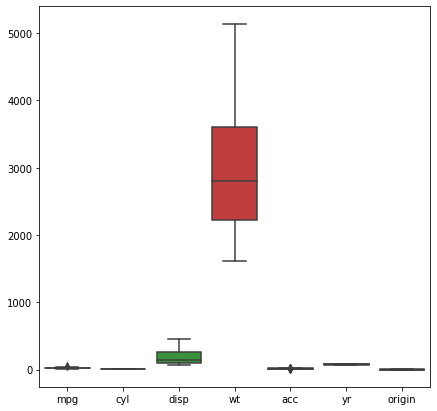

In [10]:
plt.figure(figsize=(7,7))
sns.boxplot(data=car)

So printing the 5-point summary of all variables in one graph clearly isn't practical due to scaling.

So let's create subplots and put each feature in a separate graph and see how it looks.

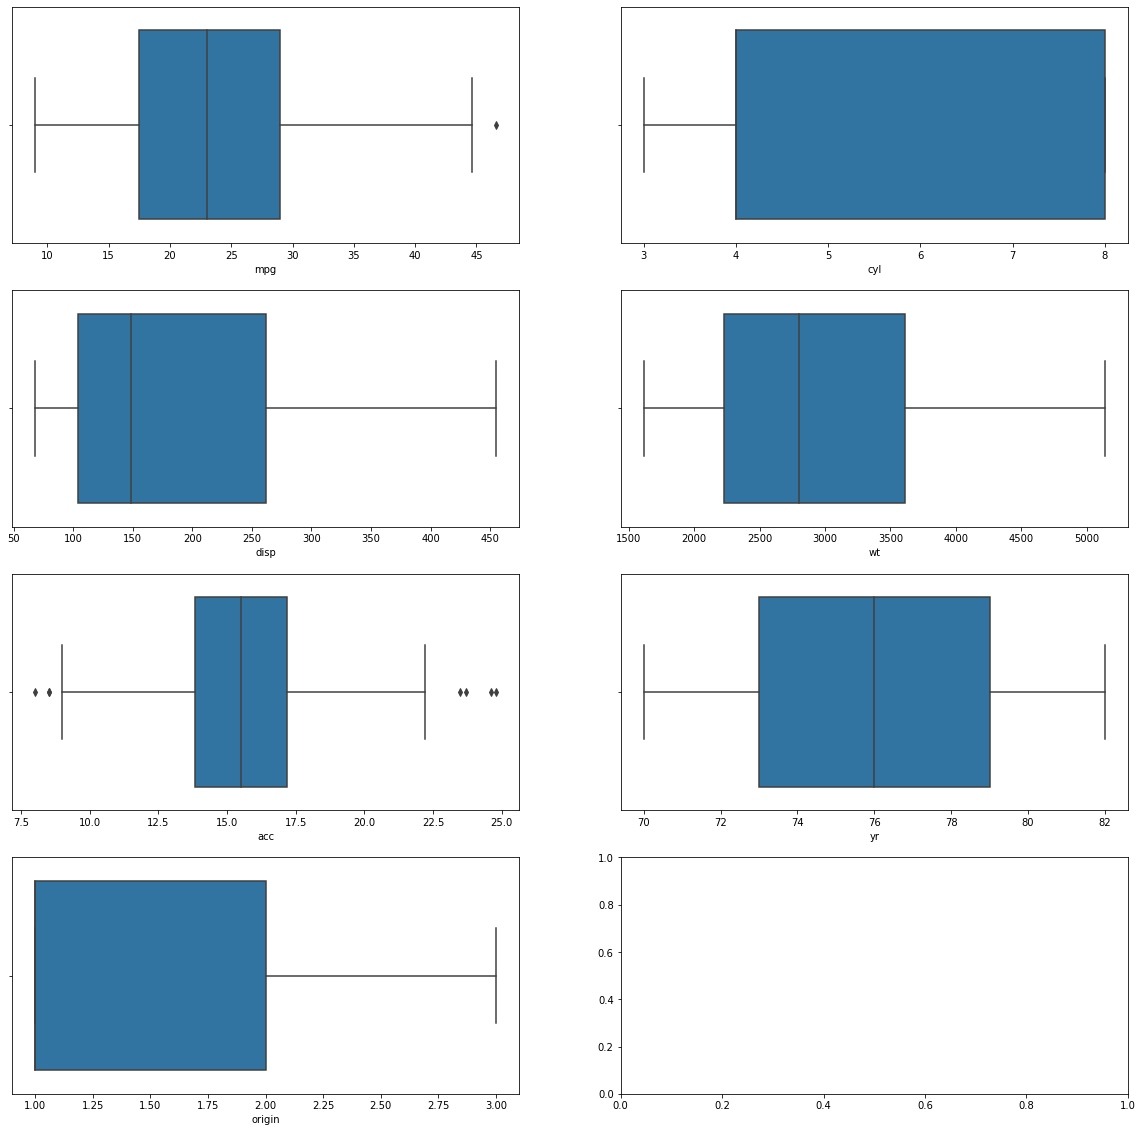

In [11]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

sns.boxplot(data=car, x="mpg", ax=axes[0][0])
sns.boxplot(data=car, x="cyl", ax=axes[0][1])
sns.boxplot(data=car, x="disp", ax=axes[1][0])
sns.boxplot(data=car, x="wt", ax=axes[1][1])
sns.boxplot(data=car, x="acc", ax=axes[2][0])
sns.boxplot(data=car, x="yr", ax=axes[2][1])
sns.boxplot(data=car, x="origin", ax=axes[3][0])

So we see that for "cyl" feature, the max whisker coincides with Q3 and also the median.

Similarly the "origin" feature has its min whisker and Q1 coinciding with median.

And for "acc" feature there are quite a few number of outliers on both ends.

## 2


### A
Print the feature-wise percentage of missing values and impute them with a suitable approach 

Earlier we saw that all features contain 398 values indicating no "traditional" missing values, rather either NaN values or unexpected values.

Okay so first step is to check for NaN values in each column.
Then impute them using mean or median.

Next we check for unexpected values. Again, we deal with them and impute using mean, median or mode depending on datatype.

In [12]:
isNa = car.isna()

In [13]:
car.describe(include='all')

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398,398.000000,398.000000,398.000000,398.0,398.000000,398.000000,398.000000,398.000000
unique,305,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN
top,ford pinto,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN
freq,6,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN
mean,NaN,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864
std,NaN,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055
min,NaN,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000
25%,NaN,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000
50%,NaN,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000
75%,NaN,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000


In [14]:
def NanOrNot(df):
  columns = df.columns
  Nan_list = list()

  for i in columns:
    if len(df[i].unique()) > 1:
      Nan_list.append(i)

  return Nan_list

In [15]:
Nan_list = NanOrNot(isNa.copy())
if not(len(Nan_list)):
  print("No Nan values in any columns")
  print("So none of the columns have any missing values.")
else:
  print("Nan values found in following columns")
  for i in Nan_list: print(i)
  print()
  print("Now let's check the percentage of missing values")

  rows, col_num = car.shape
  for i in Nan_list:
    print(f"{i}: { ( car[i].isna().value_counts()[1] / rows ) * 100 }%")

  # Now let's impute the missing values with mean or mode depending on datatype.

  describe = car.describe(include='all')

  for i in Nan_list:
    if car[i].dtype == "object":
      car[i].fillna(value=describe.loc["freq"][i], inplace=True)
    else:
      car[i].fillna(value=describe.loc["mean"][i], inplace=True)

No Nan values in any columns
So none of the columns have any missing values.


### B
Checking for duplicates and imputing them


In [16]:
bol = car.duplicated()
car[bol==False]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [17]:
car_2 = car.copy()
describe_2 = car_2.describe()
print(describe_2)
annoyed = "mean"

for i in car_2.columns:
  if car_2[i].dtype != "object":
    bool_series = car_2[i].duplicated(keep='first')
    for j, k in zip( bool_series, range( len( car_2[i] ) ) ):
      if j == True:
        car_2.at[k, i] = describe_2.loc["mean"][i]

print(car_2.describe())

for i in car_2.columns:
  if car_2[i].dtype != "object":
    bool_series = car_2[i].duplicated(keep='first')
    for j, k in zip( bool_series, range( len( car_2[i] ) ) ):
      if j == True and car_2.loc[k][i] != describe_2.loc["mean"][i]:
        print(f"At column {i} repeating value is {car_2.loc[k][i]:.4f}")
        break

car = car_2

              mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  
              mpg         cyl        disp           wt         acc  \
count  398.

So from the output we see that the new repeating values are basically the mean's of the old dataframe before imputing the duplicated values.

### C
Pairplot of all features.

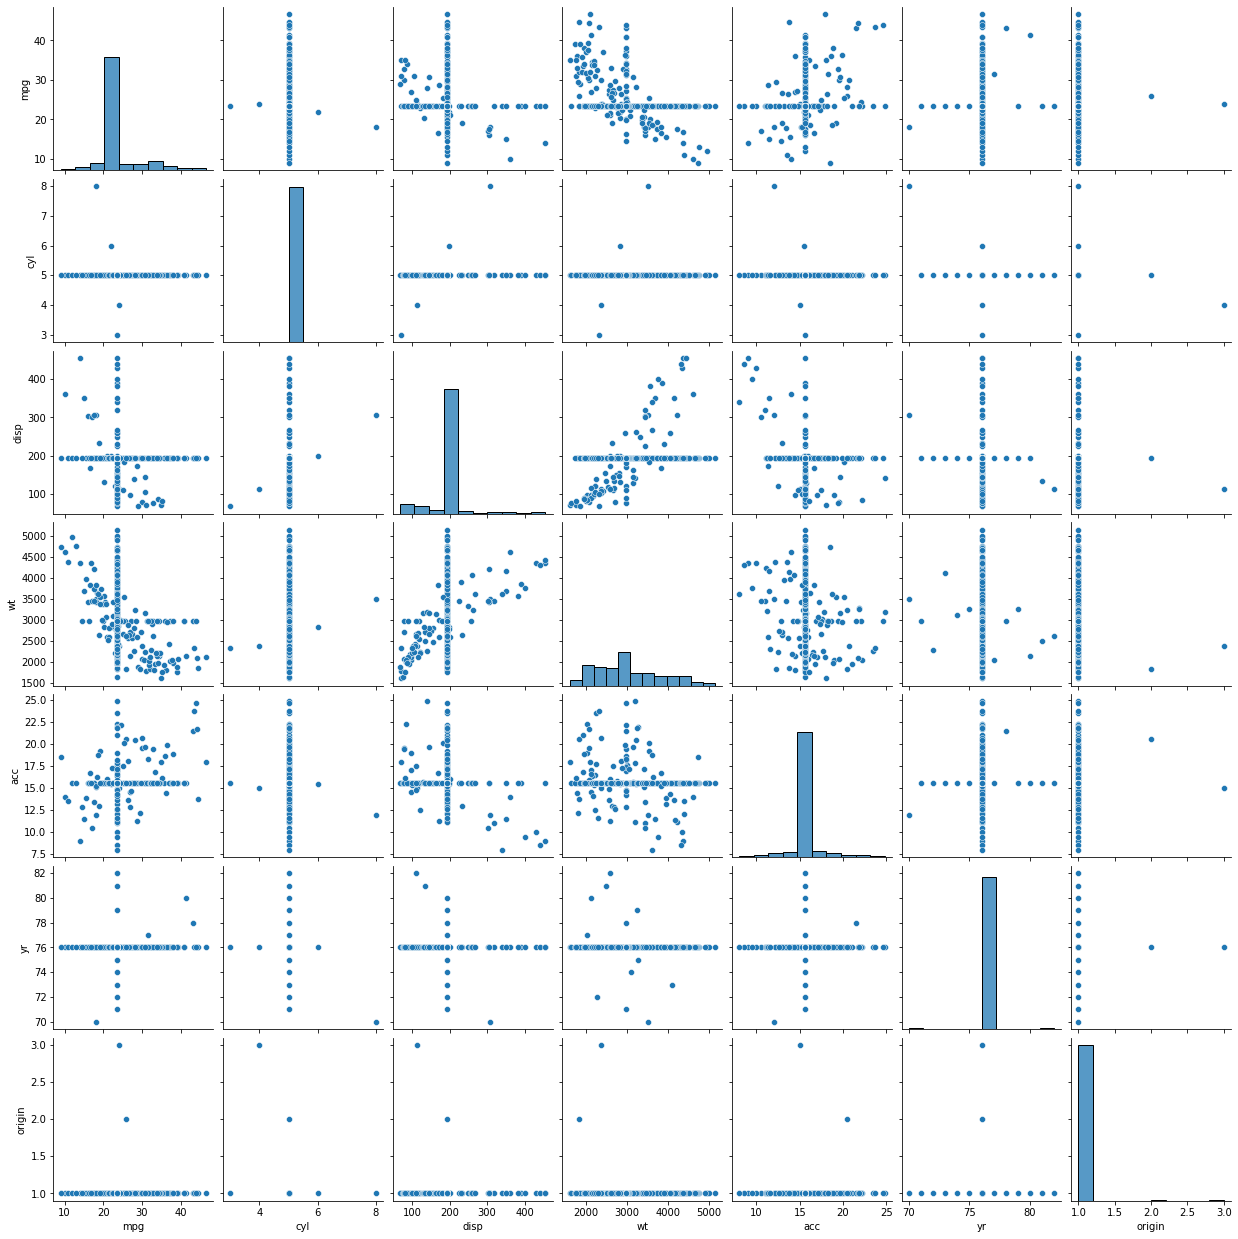

In [18]:
sns.pairplot(car)

### D
Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. 

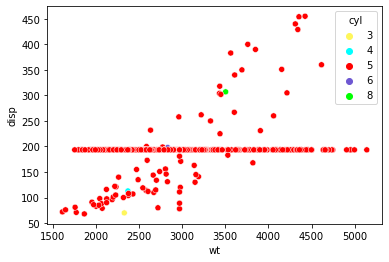

In [19]:
sns.scatterplot(data=car, x="wt", y="disp", hue="cyl", palette = ["#fef65b", "#00ffff", "#ff0000", "#6e57d2", "#00ff00"])

### E
Sharing insights for above graph.

As we can see, majority of the cylinders are 5 cylinder, and most of them either have a displacement of 200 or a linear trend with weight of vehicle.

### F
Scatterplot for 'wt' and 'mpg'.

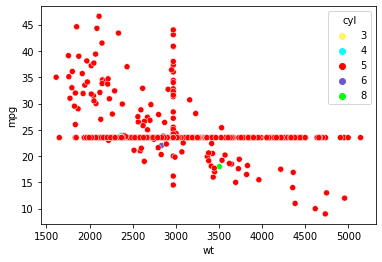

In [20]:
sns.scatterplot(data=car, x="wt", y="mpg", hue="cyl", palette = ["#fef65b", "#00ffff", "#ff0000", "#6e57d2", "#00ff00"])

### G
Sharing insights.

We can clearly see a negative correlation between 'wt' and 'mpg'.

Also there is a large number of vehicles with mileage of 25 having 5 stroke cylinder.

### H
Checking for unexpected values.

We can catch unexpected values by converting a column that is object type to numeric which it is supposed to be.

In [21]:
unexp_list = list()

for i in car.columns:
  try:
    if car[i].dtype == "object" and i != "car_name":
      car[i] = car[i].astype("float64")
  except:
    unexp_list.append(i)

In [22]:
unexp_list

['hp']

Okay so, only hp has unexpected values. Let's iterate through the list and replace the unexpected values with mean.

In [23]:
car_2 = car.copy()

for i, j in zip(car_2["hp"], range(len(car_2))):
  try:
    car_2.at[j, "hp"] = int(i)
  except:
    car_2.at[j, "hp"] = np.nan

car_2["hp"] = car_2.hp.astype("float64")
describe = car_2.describe(include='all')
mean = describe.loc["mean"]["hp"]
print("Mean of hp is ", mean)

car = car_2.fillna(value=describe.loc["mean"]["hp"])

Mean of hp is  104.46938775510205


## 3


### A
Applying K-means clustering for 2 to 10 clusters.

Before we apply clustering, we need to first scale the data.

In [24]:
car_x = car.drop("car_name", axis=1)
car_scaled = car_x.apply(zscore)

In [25]:
distortions = list()

for i in range(2, 11):
  model = KMeans(n_clusters=i)
  model.fit(car_scaled)
  distortions.append(sum(np.min(cdist(car_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / car_scaled.shape[0])

### B
Plot a visual and find elbow points.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

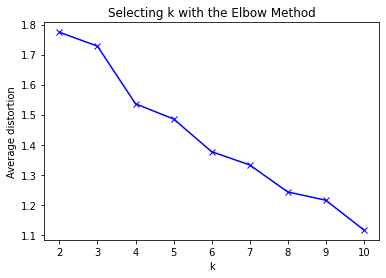

In [26]:
fig, axes = plt.subplots()

axes.plot(range(2, 11), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Elbow points are 6 in this iteration.

### C

Highlighthing the elbow point using arrow or some text.

Text(6, 1.3767188905812384, 'Elbow point')

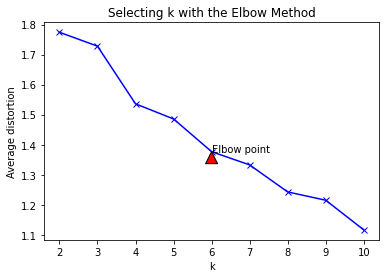

In [27]:
fig, axes = plt.subplots()

axes.plot(range(2, 11), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

axes.annotate(s="Elbow point",
              xy=(6, distortions[4]),
              arrowprops=dict(facecolor='red', 
                              shrink=0.005)
              )

### D
Training a clustering model again using optimal cluster number.

In [28]:
model_2 = KMeans(n_clusters=6)
model_2.fit(car_scaled)
prediction = model_2.predict(car_scaled)

### E
Adding a new feature in dataframe that will have labels that model predicted.

In [29]:
prediction

array([5, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 2, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 2, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 0, 4, 4, 4, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 4, 0, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 0, 1, 4, 4, 4, 4, 4, 0, 1, 0, 1,
       0, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4,
       4, 4, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 1, 0, 4, 0, 1,

In [30]:
car_pred = car_x.copy()

In [31]:
car_pred["groups"] = prediction

In [32]:
car_pred.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,groups
0,18.000000,8,307.0,130.0,3504,12.00000,70,1,5
1,15.000000,5,350.0,165.0,3693,11.50000,76,1,2
2,23.514573,5,318.0,150.0,3436,11.00000,76,1,2
3,16.000000,5,304.0,150.0,3433,15.56809,76,1,4
4,17.000000,5,302.0,140.0,3449,10.50000,76,1,2


### F
Scatterplot of 'wt' and 'mpg' based on grouping.

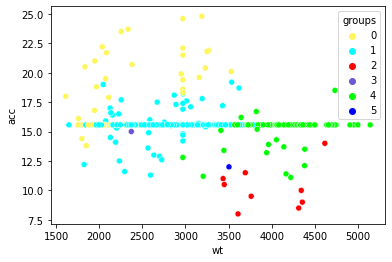

In [34]:
sns.scatterplot(data=car_pred, x='wt', y='acc', hue='groups', palette = ["#fef65b", "#00ffff", "#ff0000", "#6e57d2", "#00ff00", "#0000ff"])

In [35]:
car_pred["groups"].value_counts()

1    229
4     90
0     64
2     13
5      1
3      1
Name: groups, dtype: int64

So by looking at the value counts and the distribution of the clusters we see that majority of the data points come under 'group 1' in the center, while the rest are on the periphery.

### G
Passing a new datapoint into the model and seeing which cluster it belongs to.

In [36]:
new_datapoint = pd.DataFrame({"mpg":17.0, "cyl":8, "disp":310, "hp":140.0, "wt":3483, "acc":13.0, "yr":65, "origin":1}, index=[0])

In [37]:
prediction_new = model_2.predict(new_datapoint)
print(f"Cluster predicted: {prediction_new}")

Cluster predicted: [2]


# Part B

## 1


### A
Read 'vehicle.csv' into a dataframe.

In [38]:
vehicle = pd.read_csv("/content/drive/MyDrive/Great Learning AIML/Unsupervised Learning/Unsupervised Learning Project/vehicle.csv")

### B
Check for missing values and impute with best approach.

In [39]:
def NanOrNot(df):
  columns = df.columns
  Nan_list = list()

  for i in columns:
    if len(df[i].unique()) > 1:
      Nan_list.append(i)

  return Nan_list

In [40]:
isNa = vehicle.isna()
Nan_list = NanOrNot(isNa.copy())
if not(len(Nan_list)):
  print("No Nan values in any columns")
  print("So none of the columns have any missing values.")
else:
  print("Nan values found in following columns")
  for i in Nan_list: print(i)

  print("Now let's check the percentage of missing values\n")

  rows, col_num = vehicle.shape
  for i in Nan_list:
    print(f"{i}: { round(( ( vehicle[i].isna().value_counts()[1] / rows ) * 100 ), 2) }%")

  # Now let's impute the missing values with mean or mode depending on datatype.

  describe = vehicle.describe(include='all')

  for i in Nan_list:
    if vehicle[i].dtype == "object":
      vehicle[i].fillna(value=describe.loc["freq"][i], inplace=True)
    else:
      vehicle[i].fillna(value=describe.loc["mean"][i], inplace=True)

  print("All missing values have been dealt with")

Nan values found in following columns
circularity
distance_circularity
radius_ratio
pr.axis_aspect_ratio
scatter_ratio
elongatedness
pr.axis_rectangularity
scaled_variance
scaled_variance.1
scaled_radius_of_gyration
scaled_radius_of_gyration.1
skewness_about
skewness_about.1
skewness_about.2
Now let's check the percentage of missing values

circularity: 0.59%
distance_circularity: 0.47%
radius_ratio: 0.71%
pr.axis_aspect_ratio: 0.24%
scatter_ratio: 0.12%
elongatedness: 0.12%
pr.axis_rectangularity: 0.35%
scaled_variance: 0.35%
scaled_variance.1: 0.24%
scaled_radius_of_gyration: 0.24%
scaled_radius_of_gyration.1: 0.47%
skewness_about: 0.71%
skewness_about.1: 0.12%
skewness_about.2: 0.12%
All missing values have been dealt with


In [41]:
vehicle.describe(include='all')

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,car
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,429
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388,NaN
std,8.234474,6.133943,15.740902,33.400979,7.882119,4.601217,33.195188,7.811559,2.588326,14.515652,31.355195,176.457706,32.546223,7.468450,4.903148,8.930792,6.152166,7.438797,NaN
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,NaN
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.250000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000,NaN
50%,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,364.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000,NaN
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.750000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000,NaN


In [42]:
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### C
Plotting a pie-chart for classes feature.

In [43]:
vehicle["class"].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

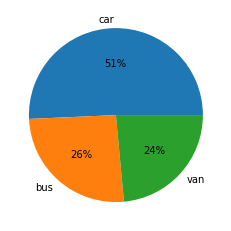

In [44]:
plt.pie(vehicle["class"].value_counts(), labels=vehicle["class"].value_counts().index, autopct='%.0f%%');

### D
Check for duplicate values and impute with best approach.

In [45]:
describe = vehicle.describe()
mean = "mean"

for i in vehicle.columns:
  if vehicle[i].dtype != "object":
    bool_series = vehicle[i].duplicated(keep="first")

    for j, k in zip(bool_series, range(len(vehicle[i]))):
      if j == True:
        vehicle.at[k, i] = describe.loc[mean][i]

## 2


### A
Split data into X and Y.

In [46]:
X = vehicle.drop(["class"], axis=1)
Y = vehicle["class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, stratify=Y)

### B
Standardizing the data.

In [47]:
X_scaled = X.apply(zscore)

## 3

### A
Train a base classification model using SVM.

In [48]:
svm_base = SVC()

In [49]:
svm_base.fit(X_train, Y_train)

SVC()

In [50]:
y_svm_base_pred = svm_base.predict(X_train)

### B
Print all data metrics related to above model.

In [51]:
print(classification_report(Y_train, y_svm_base_pred))

              precision    recall  f1-score   support

         bus       1.00      0.07      0.14       163
         car       0.55      0.90      0.69       322
         van       0.52      0.33      0.40       149

    accuracy                           0.56       634
   macro avg       0.69      0.44      0.41       634
weighted avg       0.66      0.56      0.48       634



### C
Applying PCA to 10 components.

In [52]:
X_scaled.shape

(846, 18)

In [53]:
pca_10 = PCA(n_components=10)
pca_10.fit(X_scaled)

PCA(n_components=10)

In [54]:
np.cumsum(pca_10.explained_variance_ratio_)

array([0.2238078 , 0.37275436, 0.45386493, 0.52288034, 0.5844719 ,
       0.63845724, 0.68733673, 0.73254595, 0.77392134, 0.81124047])

### D
Visualizing Cumulative Variance Explained with number of components.

In [55]:
pca_all = PCA(n_components=18)
pca_all.fit(X_scaled)

PCA(n_components=18)

In [56]:
np.cumsum(pca_all.explained_variance_ratio_)

array([0.2238078 , 0.37275436, 0.45386493, 0.52288034, 0.5844719 ,
       0.63845724, 0.68733673, 0.73254595, 0.77392134, 0.81124047,
       0.84504518, 0.87638758, 0.90514869, 0.93147041, 0.95626173,
       0.97638785, 0.99108571, 1.        ])

In [57]:
pca_all.explained_variance_ratio_

array([0.2238078 , 0.14894656, 0.08111057, 0.0690154 , 0.06159156,
       0.05398534, 0.0488795 , 0.04520921, 0.04137539, 0.03731913,
       0.03380471, 0.0313424 , 0.0287611 , 0.02632173, 0.02479131,
       0.02012612, 0.01469787, 0.00891429])

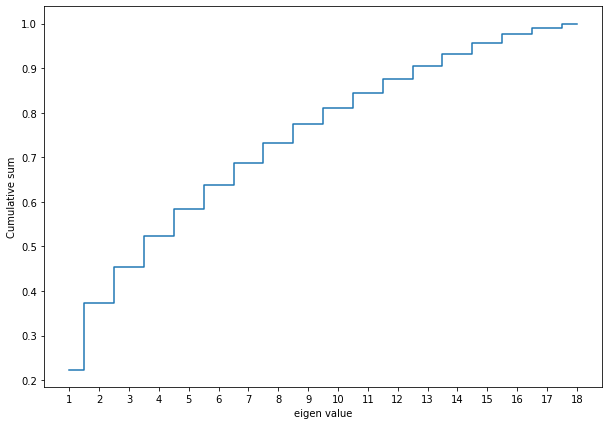

In [58]:
plt.figure(figsize=(10, 7))
plt.step(x=list(range(1, 19)), y=np.cumsum(pca_all.explained_variance_ratio_), where="mid")
plt.xlabel("eigen value")
plt.ylabel("Cumulative sum")
plt.xticks(list(range(1, 19)))
plt.show()

### E
Drawing a horizontal line where cumulative is 90%.

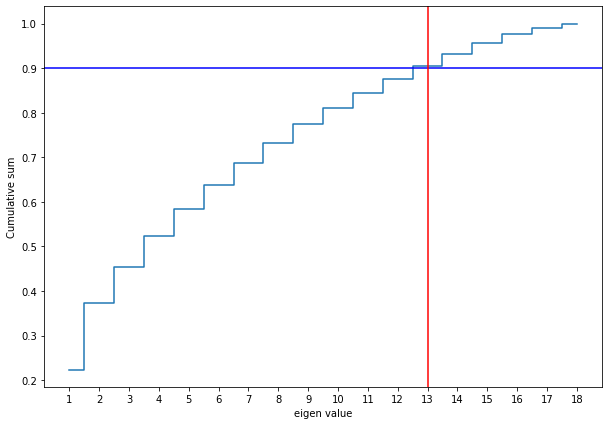

In [59]:
plt.figure(figsize=(10, 7))
plt.step(x=list(range(1, 19)), y=np.cumsum(pca_all.explained_variance_ratio_), where="mid")
plt.axhline(y=0.9, color='b')
plt.axvline(x = 13, color='r')
plt.xlabel("eigen value")
plt.ylabel("Cumulative sum")
plt.xticks(list(range(1, 19)))
plt.show()

So this horizontal line corresponds to 13 components.

### F
Apply PCA to data. This time selecting minimum components with 90% or above variance.

In [60]:
pca_13 = PCA(n_components=13)
pca_output = pca_13.fit_transform(X_scaled)

### G
Fitting a SVM model on principal components selected from above steps.

In [61]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(pca_output, Y, random_state=42, stratify=Y)

In [62]:
svm_comp = SVC()
svm_comp.fit(X_train_pca, Y_train_pca)

SVC()

### H
Printing classification report for above model.

In [63]:
y_svm_comp_pred = svm_comp.predict(X_train_pca)

In [64]:
print("\x1b[1;31mBefore PCA\x1b[0m")
print(classification_report(Y_train, y_svm_base_pred))

Before PCA
              precision    recall  f1-score   support

         bus       1.00      0.07      0.14       163
         car       0.55      0.90      0.69       322
         van       0.52      0.33      0.40       149

    accuracy                           0.56       634
   macro avg       0.69      0.44      0.41       634
weighted avg       0.66      0.56      0.48       634



In [65]:
print("\x1b[1;32mAfter PCA\x1b[0m")
print(classification_report(Y_train_pca, y_svm_comp_pred))

After PCA
              precision    recall  f1-score   support

         bus       0.90      0.22      0.35       163
         car       0.59      0.97      0.73       322
         van       0.79      0.35      0.48       149

    accuracy                           0.63       634
   macro avg       0.76      0.51      0.52       634
weighted avg       0.72      0.63      0.58       634



After applying PCA, we see that almost all performance metrics have increased by an appreciable amount.

## 4

### A
Train another SVM model and hypertune its parameters.

In [66]:
svm_tune = SVC()
svm_tune.fit(X_train_pca, Y_train_pca)

SVC()

In [67]:
param_grid_svm = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} 

In [68]:
grid_svm = GridSearchCV(svm_tune, param_grid_svm, refit = True, verbose = 3)
grid_svm.fit(X_train_pca, Y_train_pca)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.516 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.516 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.504 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

### B
Sharing best Parameters observed from above step.

In [69]:
print(f"\x1B[1mBest score:\x1B[0m {grid_svm.best_score_}")
print(f"\x1B[1mBest parameters:\x1B[0m\n {grid_svm.best_params_}")
print(f"\x1B[1mBest estimetor:\x1B[0m\n {grid_svm.best_estimator_}")

Best score: 0.5678540182477191
Best parameters:
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best estimetor:
 SVC(C=1, gamma=0.1)


### C
Print performance metrics for train data and sharing insights.

In [70]:
y_svm_pca_tuned_pred = grid_svm.predict(X_train_pca)

In [71]:
print("\x1b[1;35mBefore Hypertuning\x1b[0m")
print(classification_report(Y_train_pca, y_svm_comp_pred))

Before Hypertuning
              precision    recall  f1-score   support

         bus       0.90      0.22      0.35       163
         car       0.59      0.97      0.73       322
         van       0.79      0.35      0.48       149

    accuracy                           0.63       634
   macro avg       0.76      0.51      0.52       634
weighted avg       0.72      0.63      0.58       634



In [72]:
print("\x1b[1;33mAfter Hypertuning\x1b[0m")
print(classification_report(Y_train_pca, y_svm_pca_tuned_pred))

After Hypertuning
              precision    recall  f1-score   support

         bus       0.95      0.23      0.37       163
         car       0.60      0.95      0.74       322
         van       0.72      0.42      0.53       149

    accuracy                           0.64       634
   macro avg       0.76      0.53      0.55       634
weighted avg       0.72      0.64      0.60       634



So after hypertuning, *overall accuracy of model has only increased by 1%, but we do see a significant improvement in other performance metrics, with the exception of the recall and precision of 'car' and 'van' respectively.

## 5

### A
Explaining the prerequisites/assumptions of PCA.

1. There must be linearity in the data set, i.e. the variables combine in a linear manner to form the dataset. The variables exhibit relationships among themselves.
2. PCA assumes that the principal component with high variance must be paid attention and the PCs with lower variance are disregarded as noise. 
3. All variables should be accessed on the same ratio level of measurement.
4. Extreme values that deviate from other data points in any dataset, which are also called outliers, should be less.
5. The feature set must be correlated and the reduced feature set after applying PCA will represent the original data set but in an effective way with fewer dimensions.

### B
Advantages and disadvantages of PCA.

Advantages:
1. The PCA can counteract the issues of a high-dimensional data set.

One of the main issues when analyzing a high-dimensional data set is the overfitting: this happens when there are too many variables in the data set. Using PCA to lower the dimensions of the data set can prevent such an overfit.

2. Correlated features removed.

It helps us to reduce a very large data set. This can be very useful if we need to run an algorithm through our data and/or visualize it. Otherwise, it would be very difficult to easily visualize all of our features.

3. Speeds up other machine learning algorithms.

When we use the principal components of the data set instead of all the variables and want to implement machine learning algorithms, this will help them to converge faster. With fewer features, the training time of the algorithms will decrease.

4. Improves visualization.

The PCA helps us to transform our data in high dimensions to a low dimensional data set, so we can visualize it a lot better.

Disadvantages:

1. Data normalization required before performing the PCA.

The PCA algorithm identifies those directions in which the variance in the data is bigger. As the variance of a variable is measured on its own squared scale, before calculating the principal components all the variables should have a mean of 0 and a standard deviation of 1. Otherwise, those variables whose scale is bigger would dominate the PCA.

2. We may lose some valuable information.

Using the Principal Component Analysis can lead to some loss of information if we don’t select the right number of principal components that our data set and its variance needs.

3. Major components may be difficult to understand.

When we implement the Principal Component Analysis to our data set, the original features will be transformed into principal components: linear combinations of features of the original data. But which features, variables or characteristics are the most significant in the data set? This question can be difficult to answer after computing the PCA.